In [4]:
import pandas as pd

In [3]:
df=pd.read_excel("filtered_data.xlsx")
print(df.shape)

(86261, 7)


In [35]:
columns=['Гүйлгээний огноо', 'Харилцагчийн код', 'Харилцагчийн нэр', 'Дебет - ₮', 'Кредит -₮',"Тооцооны төрөл" ]


avlaga_nasjilt=pd.read_excel("Авлага_насжилт.xlsx", usecols=columns)
print(avlaga_nasjilt.shape)
print(avlaga_nasjilt.columns)

(10328, 6)
Index(['Гүйлгээний огноо', 'Тооцооны төрөл', 'Харилцагчийн код',
       'Харилцагчийн нэр', 'Дебет - ₮', 'Кредит -₮'],
      dtype='object')


In [36]:
# Огноог datetime болгох
avlaga_nasjilt['Гүйлгээний огноо'] = pd.to_datetime(avlaga_nasjilt['Гүйлгээний огноо'], errors='coerce')
# avlaga_nasjilt['Гүйлгээний огноо'] = pd.to_datetime(avlaga_nasjilt['Гүйлгээний огноо'], format='%Y-%m-%d')
# avlaga_nasjilt['Гүйлгээний огноо'] = avlaga_nasjilt['Гүйлгээний огноо'].dt.strftime('%Y-%m-%d')
# Сар багана гаргах
avlaga_nasjilt['Сар'] = avlaga_nasjilt['Гүйлгээний огноо'].dt.to_period('M')

In [37]:
avlaga_nasjilt["Үлдэгдэл"] = avlaga_nasjilt['Дебет - ₮'] - avlaga_nasjilt['Кредит -₮']

In [38]:
pivot_sorted= avlaga_nasjilt.sort_values(['Харилцагчийн код', 'Харилцагчийн нэр', 'Тооцооны төрөл', 'Сар'])
pivot_sorted['Нийт үлдэгдэл'] = pivot_sorted.groupby(['Харилцагчийн код', 'Харилцагчийн нэр', 'Тооцооны төрөл',])['Үлдэгдэл'].cumsum()
latest_balances = pivot_sorted.groupby(['Харилцагчийн код', 'Харилцагчийн нэр', 'Тооцооны төрөл']).last().reset_index()
# pivot_table = avlaga_nasjilt.groupby(['Харилцагчийн код', 'Харилцагчийн нэр', 'Сар'])["Үлдэгдэл"].sum().reset_index()
latest_balances = latest_balances[latest_balances['Нийт үлдэгдэл'] != 0]

In [39]:
latest_balances.to_excel("latest_balances.xlsx", index=False)

In [26]:
last_c2=pivot_filtered.sort_values("Сар").groupby(['Харилцагчийн код', 'Харилцагчийн нэр']).tail(1)

In [27]:
last_c2.to_excel("pivot_filtered.xlsx", index=False)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel("ЕЖ.xlsx")
print(df.columns)


# pd.read_excel("ЕЖ.xlsx", usecols=['Гүйлгээний утга', 'Харилцагчийн нэр', 'Тооцооны төрөл', 'Сар', 'Нийт үлдэгдэл']).to_excel("ЕЖ.xlsx", index=False)

Index(['Дугаар', 'ДТ2', 'КТ2', 'ДТ4', 'КТ4', 'ДТ6', 'КТ6', 'сар, өдөр',
       'дугаар\n', 'Гүйлгээний утга', 'Дүн', 'Дебет', 'Кредит\n'],
      dtype='object')


In [18]:
df['Огноо'] = pd.to_datetime(df['сар, өдөр'])
# print(df["Дүн"].head(10))
debet_df = df[["Огноо", "Дебет", "Дүн"]].rename(columns={"Дебет": "Данс код"})
debet_df["Сар"] = debet_df["Огноо"].dt.to_period("M")
pivot = debet_df.groupby([ "Данс код"])["Дүн"].sum().reset_index()


float64
0    8.888615e+08
1    6.928758e+08
2    5.501489e+07
3    1.215765e+09
4    3.482523e+09
5    8.824883e+08
6    2.591656e+08
7    6.920908e+08
8    3.306070e+08
9    8.320365e+08
Name: Дүн, dtype: float64
PN тооцоо.xlsx
0     888861483.49
1     692875823.00
2      55014890.00
3    1215764793.23
4    3482522515.92
5     882488279.63
6     259165564.00
7     692090817.40
8     330607023.63
9     832036453.71
Name: Дүн, dtype: object


C:\Users\PeDBaG\AppData\Local\Temp\ipykernel_21680\2205876969.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


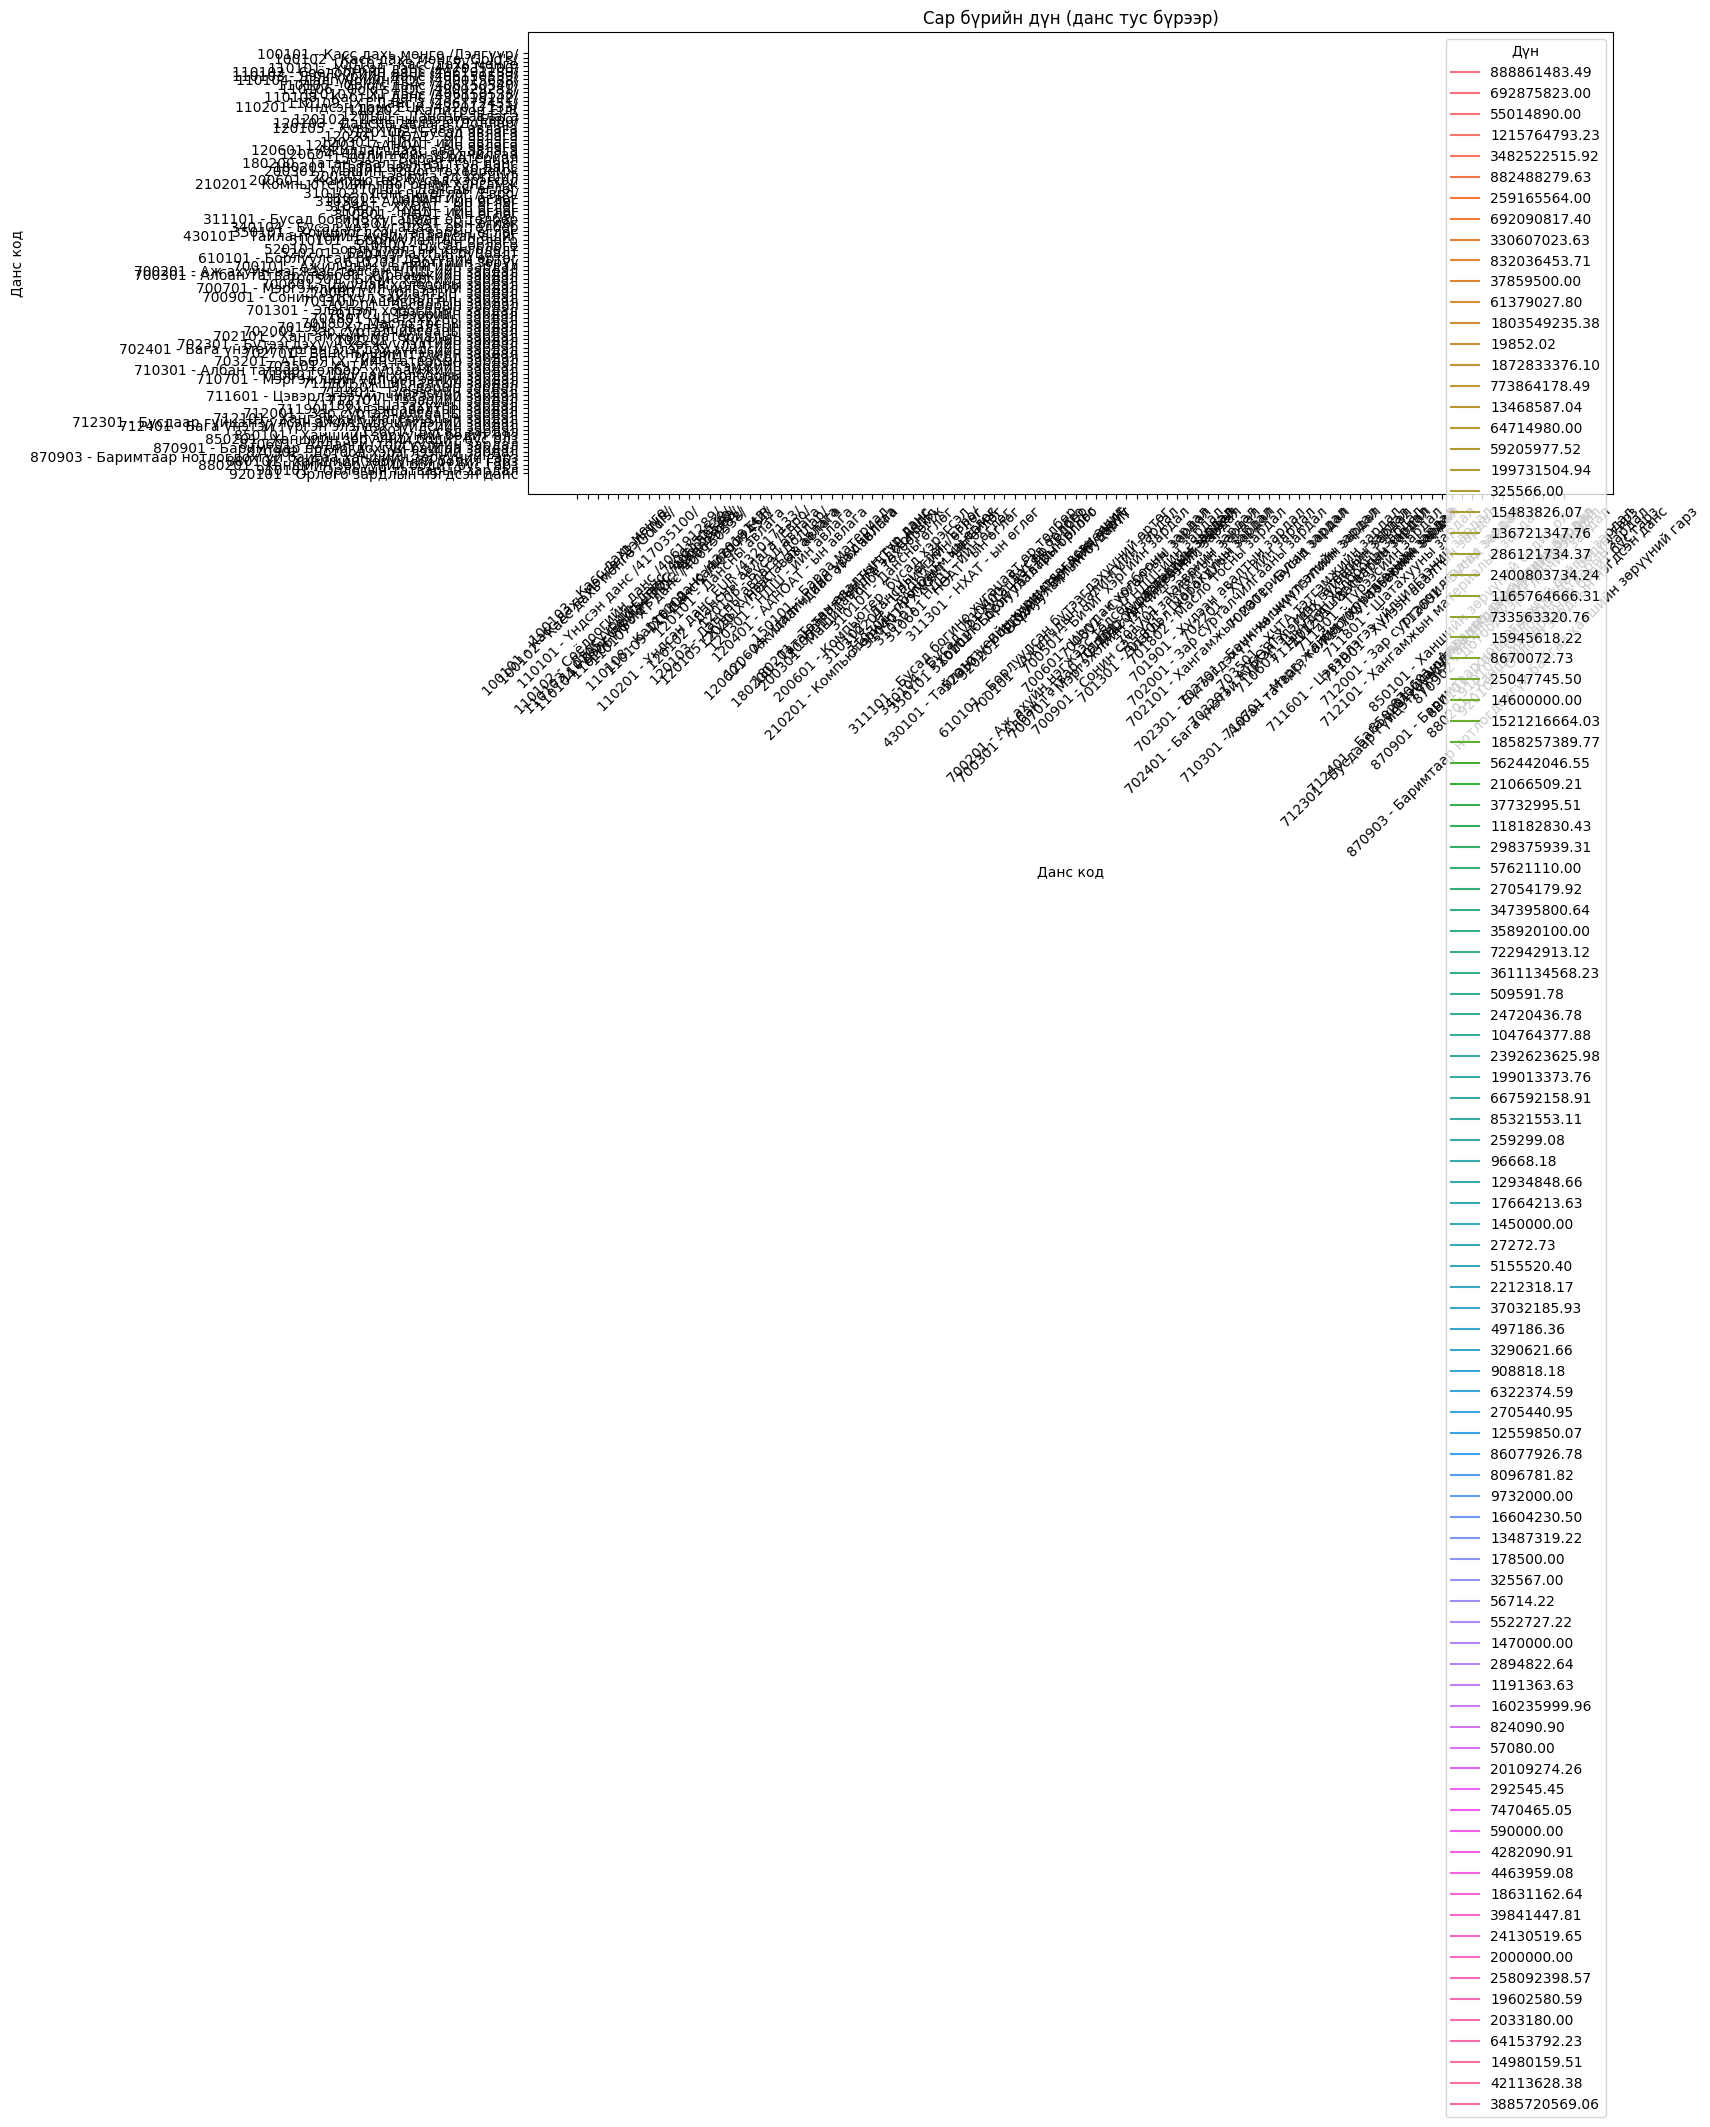

In [ ]:
# Дүн баганыг тоон төрөлд хөрвүүлэх
pivot['Дүн'] = pd.to_numeric(pivot['Дүн'], errors='coerce')

# График зурна
import matplotlib.pyplot as plt
import seaborn as sns

print(pivot["Дүн"].dtype)
print(pivot["Дүн"].head(10))
print("PN тооцоо.xlsx")
# print(pivot["Сар"].dtype)
plt.figure(figsize=(14, 6))
# pivot['Сар'] = pivot['Сар'].astype(str)  # Сар баганыг string төрөлд хөрвүүлэх
pivot["Дүн"]=pivot["Дүн"].map('{:.2f}'.format)  # Дүн баганыг форматлах
print(pivot["Дүн"].head(10))
sns.lineplot(data=pivot, x='Сар', y='Дүн', hue='Данс код')

plt.title('Сар бүрийн дүн (данс тус бүрээр)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=monthly, x='Сар', y='Дүн')

plt.title('Сар бүрийн нийт дүн')
plt.xticks(rotation=45)
plt.ylabel('Дүн (₮)')
plt.xlabel('Сар')
plt.tight_layout()
plt.show()